In [3]:
from scipy.spatial import distance_matrix
import numpy as np
import pandas as pd

A = [[2,3],[4,2],[4,5],[6,6],[7,6],[8,8],[9,6]]
B = np.triu(distance_matrix(A,A))
B = np.around(B,2)
B

array([[0.  , 2.24, 2.83, 5.  , 5.83, 7.81, 7.62],
       [0.  , 0.  , 3.  , 4.47, 5.  , 7.21, 6.4 ],
       [0.  , 0.  , 0.  , 2.24, 3.16, 5.  , 5.1 ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 2.83, 3.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 2.24, 2.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 2.24],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [ ]:
np.where(B == np.min(B[np.nonzero(B)]))

In [ ]:
B[3][4] = 0

In [ ]:
B

In [ ]:
import copy as cp

def achaCluster(ponto,clusters):
    for key in clusters:
        for pos in range(len(clusters[key])):
            if(clusters[key][pos] == ponto):
                return key
    return False

def mergeClusters(clus, indice1, indice2):
    clusters = cp.deepcopy(clus)
    for i in range(len(clusters[indice2])):
        clusters[indice1].append(clusters[indice2][i])
    clusters.pop(indice2)
    return clusters

In [ ]:
from scipy.spatial import distance_matrix
import numpy as np

X = pd.read_csv('cluster.dat', sep = ' ', header = None)
X = (X-X.min())/(X.max()-X.min()) #Normalizando os dados de entrada
X = X.values 

A = X.tolist()
B = np.triu(distance_matrix(A,A))

clusters = {}
tamanho = 0
i = 0
while(len(clusters) != 3 or tamanho != len(A)):
    Indice_min = np.where(B == np.min(B[np.nonzero(B)]))
    PontoA = Indice_min[0][0]
    PontoB = Indice_min[1][0]
    
    ClusterA = achaCluster(A[PontoA], clusters)
    ClusterB = achaCluster(A[PontoB], clusters)
    
    if(not ClusterA and not ClusterB):
        clusters[len(clusters)] = [A[PontoA],A[PontoB]]
    elif(not ClusterA):
        if(A[PontoA] not in clusters[ClusterB]):
            clusters[ClusterB].append(A[PontoA])
    elif(not ClusterB):
        if(A[PontoB] not in clusters[ClusterA]):
            clusters[ClusterA].append(A[PontoB])
    else:
        if(ClusterA != ClusterB):
            mergeClusters(clusters, ClusterA, ClusterB)
        
    B[PontoA][PontoB] = 0
    tamanho = sum(len(cluster) for cluster in clusters.values())
    print(tamanho)
print(clusters)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
tamanho = sum(len(cluster) for cluster in clusters.values())
print(tamanho)
def kmeansplot(clusters):
    cores = ['r','b','g','c','m','y']
    i = 0
    for key in clusters:
        cluster = np.array(clusters[key])
        plt.scatter(cluster[:,0] , cluster[:,1], s=75, color=cores[i],  edgecolor='k',label='cluster 1')
        i+= 1
    plt.legend(scatterpoints=1)
    plt.show()
kmeansplot(clusters)
print(len(clusters))

In [ ]:
clusters = {1:[1,2,3], 2:[4,5,6], 3:[7,8,9]}
tamanho = sum(len(cluster) for cluster in clusters.values())
print(tamanho)
mergeClusters(clusters, 2, 3)
tamanho = sum(len(cluster) for cluster in clusters.values())
print(tamanho)
len(B[0])

In [ ]:
a = achaCluster([1,1],test)
print(a)

In [4]:
import copy as cp

def achaCluster(ponto,clusters):
    for key in clusters:
        for pos in range(len(clusters[key])):
            if(clusters[key][pos] == ponto):
                return key
    return -1

def mergeClusters(clus, indice1, indice2):
    clusters = cp.deepcopy(clus)
    for i in range(len(clusters[indice2])):
        clusters[indice1].append(clusters[indice2][i])
    clusters.pop(indice2)
    return clusters

def newCluster(clusters, PontoA, PontoB):
    i = len(clusters)
    keys = clusters.keys()
    while(True):
        if(i not in keys):
            clusters[i] = [PontoA,PontoB]
            break
        i += 1
    return clusters

In [ ]:
from scipy.spatial import distance_matrix
import numpy as np

X = pd.read_csv('cluster.dat', sep = ' ', header = None)
X = (X-X.min())/(X.max()-X.min()) #Normalizando os dados de entrada
X = X.values 

A = X.tolist()
B = np.triu(distance_matrix(A,A))

clusters = {}
tamanho = 0
i = 0
while(len(clusters) != 3 or tamanho != len(A)):
    Indice_min = np.where(B == np.min(B[np.nonzero(B)]))
    PontoA = Indice_min[0][0]
    PontoB = Indice_min[1][0]
    
    keyA = achaCluster(PontoA, clusters)
    keyB = achaCluster(PontoB, clusters)
    if(keyA == -1 and keyB == -1):
        clusters = newCluster(clusters, PontoA, PontoB)
    elif(keyA == -1):
        if(PontoA not in clusters[keyB]):
            clusters[keyB].append(PontoA)
    elif(keyB == -1):
        if(PontoB not in clusters[keyA]):
            clusters[keyA].append(PontoB)
    else:
        if(keyA != keyB):
            clusters = mergeClusters(clusters, keyA, keyB)
        
    B[PontoA][PontoB] = 0
    tamanho = sum(len(cluster) for cluster in clusters.values())
    print(len(clusters),tamanho)
print(clusters)

In [8]:
resultado = {}
for key in clusters:
    resultado[key] = []
    for i in range(len(clusters[key])):
        resultado[key].append(A[clusters[key][i]])

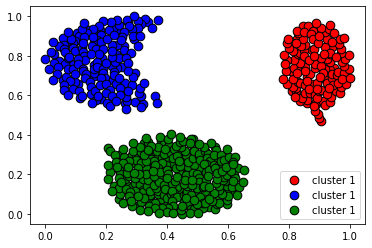

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
tamanho = sum(len(cluster) for cluster in clusters.values())

def kmeansplot(clusters):
    cores = ['r','b','g','c','m','y']
    i = 0
    for key in clusters:
        cluster = np.array(clusters[key])
        plt.scatter(cluster[:,0] , cluster[:,1], s=75, color=cores[i],  edgecolor='k',label='cluster 1')
        i+= 1
    plt.legend(scatterpoints=1)
    plt.show()

kmeansplot(resultado)